* FashionMNIST consists of grayscale images of clothing items and accessories.
* Size: 70,000 images (60,000 for training, 10,000 for testing)
* Image Size: 28x28 pixels
* Number of Classes: 10
* Channels: 1 (grayscale)
* Format: Images are stored as NumPy arrays, and labels are provided as integers.


* 0 -	T-shirt/top
* 1 -	Trouser
* 2 -	Pullover
* 3 -	Dress
* 4 -	Coat
* 5 -	Sandal
* 6 -	Shirt
* 7 -	Sneaker
* 8 -	Bag
* 9 -	Ankle boot

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [56]:
from tqdm import tqdm

* Load and preprocess FashionMNIST

In [57]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [58]:
train_dataset = torchvision.datasets.FashionMNIST(root='./FashionMNISTData', 
                                           train=True, 
                                           transform=transform, 
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./FashionMNISTData', 
                                          train=False, 
                                          transform=transform, 
                                          download=True)

In [59]:
train_loader = DataLoader(train_dataset,
                          batch_size=64,
                          shuffle=True)

test_loader = DataLoader(test_dataset,
                          batch_size=64,
                          shuffle=False)

* Function to display some images

In [60]:
def show_sample_images(dataset, num_of_images=5):
    fig, axes = plt.subplots(1, num_of_images, figsize=(10, 2))
    for i in range(num_of_images):
        image, label = dataset[i]
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

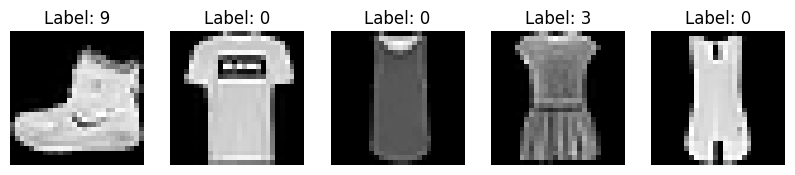

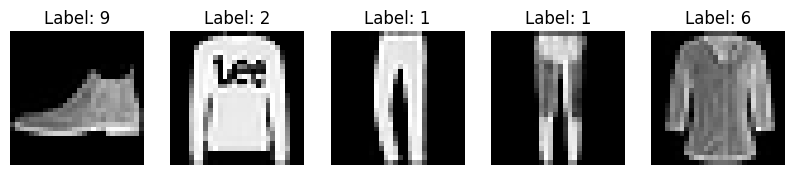

In [61]:
show_sample_images(train_dataset)
show_sample_images(test_dataset)

* Define the MLP model

In [62]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten() # Flatten 28x28 image into a 784-dim vector
        self.fc1 = nn.Linear(28*28, 512) # first hidden layer
        self.fc2 = nn.Linear(512, 256) # second hidden layer
        self.fc3 = nn.Linear(256, 128) # third hidden layer
        self.fc4 = nn.Linear(128, 10) # output layer (10 classes)

        self.relu = nn.ReLU() # activation function

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x) # # No activation for the output layer (logits)

        return x



In [63]:
# Instantiate the model
model = MLP()

* initialize model, loss and optimizer

In [64]:
learning_rate = 0.001
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

* training loop

In [65]:
def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    loss_history = []
    for epoch in range(epochs):
        total_loss = 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            if outputs is None:  # Debugging step
                print("Error: Model returned None!")
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())
        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

    return loss_history



In [66]:
# Function to plot loss history
def plot_loss(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-', color='b')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.show()


* evaluate model

In [67]:
def test(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1/10:   0%|          | 0/938 [00:33<?, ?it/s, loss=0.666]

Epoch [1/10], Loss: 0.5016


Epoch 1/10:   0%|          | 0/938 [00:33<?, ?it/s, loss=0.666]


Epoch [2/10], Loss: 0.3701


Epoch 3/10:   0%|          | 0/938 [00:33<?, ?it/s, loss=0.317]

Epoch [3/10], Loss: 0.3335


Epoch 3/10:   0%|          | 0/938 [00:33<?, ?it/s, loss=0.317]


Epoch [4/10], Loss: 0.3043


Epoch 5/10:   0%|          | 0/938 [00:33<?, ?it/s, loss=0.158] 

Epoch [5/10], Loss: 0.2866


Epoch 5/10:   0%|          | 0/938 [00:33<?, ?it/s, loss=0.158]


Epoch [6/10], Loss: 0.2701


Epoch 7/10:   0%|          | 0/938 [00:34<?, ?it/s, loss=0.263] 

Epoch [7/10], Loss: 0.2535


Epoch 7/10:   0%|          | 0/938 [00:34<?, ?it/s, loss=0.263]


Epoch [8/10], Loss: 0.2404


Epoch 9/10:   0%|          | 0/938 [00:39<?, ?it/s, loss=0.352] 

Epoch [9/10], Loss: 0.2274


Epoch 10/10:   0%|          | 0/938 [00:41<?, ?it/s, loss=0.303]


Epoch [10/10], Loss: 0.2167


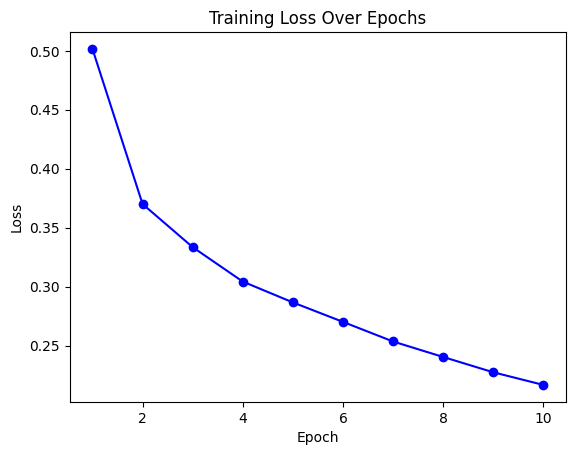

Test Accuracy: 88.42%


In [68]:
loss_history = train(model, train_loader, criterion, optimizer, epochs)
plot_loss(loss_history)
test(model, test_loader)

* save the trained model

In [69]:
torch.save(model.state_dict(), "fashion_mnist.pth")
print("Model saved successfully!")

Model saved successfully!


* Load the model and test on new images


In [71]:
loaded_model = MLP().to(device)
loaded_model.load_state_dict(torch.load("fashion_mnist.pth"))
loaded_model.eval()
print("Model loaded successfully!")

Model loaded successfully!


* make prediction

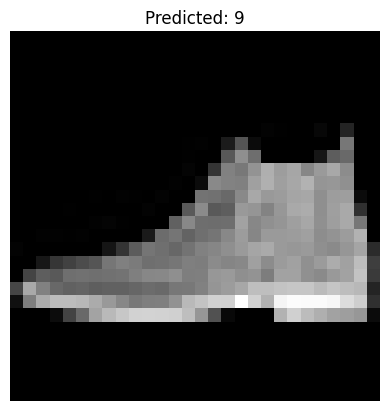

Actual: 9, Predicted: 9


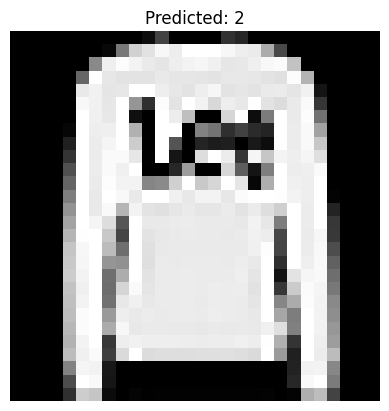

Actual: 2, Predicted: 2


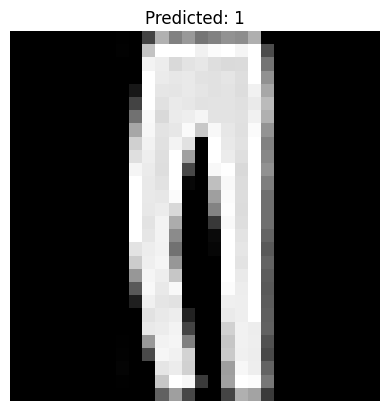

Actual: 1, Predicted: 1


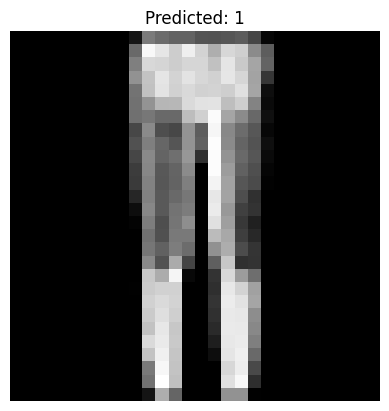

Actual: 1, Predicted: 1


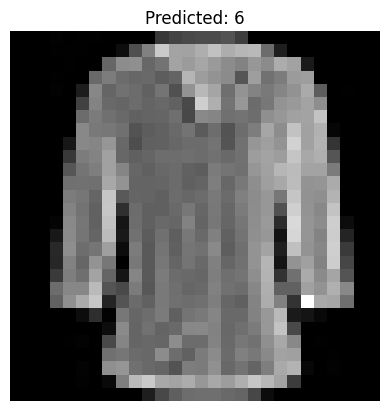

Actual: 6, Predicted: 6


In [72]:
def predict(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for i in range(5):  # Display first 5 predictions
                plt.imshow(images[i].cpu().squeeze(), cmap='gray')
                plt.title(f"Predicted: {predicted[i].item()}")
                plt.axis('off')
                plt.show()
                print(f"Actual: {labels[i].item()}, Predicted: {predicted[i].item()}")
            break  # Only process first batch

# Run predictions on test images
predict(loaded_model, test_loader)